<a href="https://colab.research.google.com/github/Ashi743/pytorch/blob/main/ANN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: kaggle dataset root to csv

import torch
from torch import nn
import pandas as pd
import kagglehub
import os
import zipfile

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

# Assuming the dataset is in a zip file
for filename in os.listdir(path):
    if filename.endswith(".zip"):
        filepath = os.path.join(path, filename)
        with zipfile.ZipFile(filepath, 'r') as zip_ref:
            zip_ref.extractall(path)
        print(f"Extracted {filename} to {path}")
        break  # Assuming only one zip file in the dataset

# Find and process the CSV files (adjust file names if needed)
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_filepath = os.path.join(path, filename)
        try:
            df = pd.read_csv(csv_filepath)

            # Now you have the CSV data in a Pandas DataFrame (df)
            # You can perform operations on df here:

            # Example: Save to a new CSV
            # df.to_csv("processed_data.csv", index=False)
        except pd.errors.ParserError as e:
            print(f"Error parsing {filename}: {e}")
        except Exception as e:  # Catch other potential errors
            print(f"An error occurred while processing {filename}: {e}")

100%|██████████| 68.8M/68.8M [00:00<00:00, 130MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


In [2]:
from sklearn.model_selection import train_test_split
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
torch.manual_seed(42)

In [4]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(60000, 785)

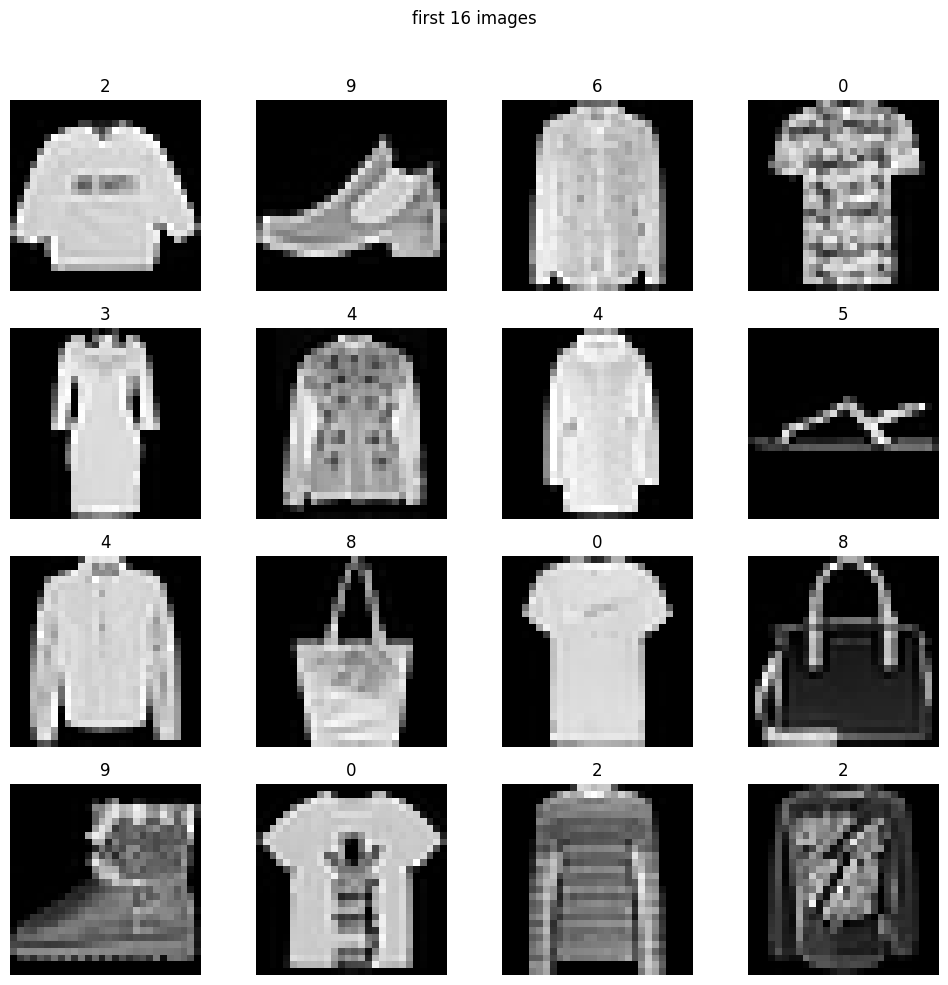

In [6]:
fig, ax= plt.subplots(nrows= 4, ncols=4, figsize=(10,10))
fig.suptitle("first 16 images")

for i, ax in enumerate(ax.flatten()):
    img= df.iloc[i, 1:].values.reshape(28,28)
    ax.imshow(img, cmap="gray")
    ax.axis("off")
    ax.set_title(df.iloc[i,0])
plt.tight_layout(rect= [0,0,1,0.96])
plt.show()

In [7]:
X= df.iloc[:, 1:].values
y= df.iloc[:, 0].values

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [10]:
#scaling
X_train= X_train/255.0
X_test= X_test/255.0

In [11]:
#custom dataset
class CustomDataset(Dataset):
  def __init__(self, features, labels):
    self.features= torch.tensor(features, dtype=torch.float32)
    self.labels= torch.tensor(labels, dtype=torch.long)         #predetermined


  def __len__(self):
    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]

In [12]:
#create train_dataset
train_dataset= CustomDataset(X_train, y_train)
len(train_dataset)

48000

In [13]:
test_dataset= CustomDataset(X_test, y_test)
len(test_dataset)

12000

In [14]:
#create datalodaer
train_dataloader= DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader= DataLoader(test_dataset, batch_size=32, shuffle=False)   #prediction needs constant data


In [20]:
#define NN class
class NeuralNetwork(nn.Module):
  def __init__(self, num_features):
    super().__init__()
    self.model= nn.Sequential(
        nn.Linear(784, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )
#celosss has softmax
  def forward(self, x):
    return self.model(x)

In [26]:
#set learning rate and epochs
epochs= 30
lr= 0.1

In [27]:
#instantiate the model
model= NeuralNetwork(X_train.shape[1])
#loss fn
loss= nn.CrossEntropyLoss()
#optimizer
optimizer= optim.SGD(model.parameters(), lr=lr)

In [28]:
#for training loop
for epoch in range(epochs):

  total_epoch_loss= 0.0
  for batch_features,batch_labels in train_dataloader:
    #forward pass
    outputs= model(batch_features)
    #loss
    loss_value= loss(outputs, batch_labels)
    #backward pass
    optimizer.zero_grad()    #to clear gradients
    loss_value.backward()
    #update weights
    optimizer.step()

    total_epoch_loss+=loss_value.item()

  avg_epoch_loss= total_epoch_loss/len(train_dataloader)
  print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_epoch_loss:.4f}")

Epoch [1/30], Loss: 0.6551
Epoch [2/30], Loss: 0.4315
Epoch [3/30], Loss: 0.3862
Epoch [4/30], Loss: 0.3583
Epoch [5/30], Loss: 0.3350
Epoch [6/30], Loss: 0.3200
Epoch [7/30], Loss: 0.3081
Epoch [8/30], Loss: 0.2949
Epoch [9/30], Loss: 0.2831
Epoch [10/30], Loss: 0.2737
Epoch [11/30], Loss: 0.2663
Epoch [12/30], Loss: 0.2559
Epoch [13/30], Loss: 0.2497
Epoch [14/30], Loss: 0.2412
Epoch [15/30], Loss: 0.2356
Epoch [16/30], Loss: 0.2321
Epoch [17/30], Loss: 0.2253
Epoch [18/30], Loss: 0.2186
Epoch [19/30], Loss: 0.2141
Epoch [20/30], Loss: 0.2082
Epoch [21/30], Loss: 0.2015
Epoch [22/30], Loss: 0.1996
Epoch [23/30], Loss: 0.1945
Epoch [24/30], Loss: 0.1897
Epoch [25/30], Loss: 0.1875
Epoch [26/30], Loss: 0.1834
Epoch [27/30], Loss: 0.1804
Epoch [28/30], Loss: 0.1729
Epoch [29/30], Loss: 0.1709
Epoch [30/30], Loss: 0.1676


In [29]:
#eval
model.eval()

NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [30]:
#evaluation code
total= 0
correct= 0
with torch.no_grad():
  for batch_features, batch_labels in test_dataloader:
    outputs= model(batch_features)       #predictions
    _, predicted= torch.max(outputs, 1)     #max(pred)
    total+= batch_labels.size(0)
    correct+= (predicted==batch_labels).sum().item()

print(correct/total)

0.887
